### 음성 데이터셋으로 성별 분류하기

### 데이터 살펴보기

|컬럼명|의미|
|---|---|
|meanfreq|평균 주파수(kHz)|
|sd|주파수의 표준편차|
|median|중간 주파수(kHz)|
|Q25|첫 번째 분위수(kHz)|
|Q75|세 번째 분위수(kHz)|
|IQR|분위 간 범위(kHz)|
|skew|왜곡도|
|kurt|kurtosis|
|sp.ent|스펙트럼 엔트로피|
|sfm|스펙트럼 평탄도|
|mode|모드 주파수|
|centroid|주파수 중심|
|meanfun|음향 신호에서 측정된 기본 주파수의 평균|
|minfun|음향 신호에서 측정된 최소 기본 주파수|
|maxfun|음향 신호에서 측정된 최대 기본 주파수|
|meandom|음향 신호에서 측정된 지배적 주파수의 평균|
|mindom|음향 신호 전반에 걸쳐 측정된 지배적 주파수의 최소값|
|maxdom|음향 신호에서 측정된 지배 주파수의 최대값|
|dfrange|음향 신호에서 측정된 주요 주파수의 범위|
|modindx|변조 지수. 주파수 범위로 나눈 기본 주파수의 인접 측정값 간의 누적 절대 차이|
|label|남성 or 여성|

In [246]:
import pandas as pd

df = pd.read_csv("./data/voice.csv")
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [248]:
# 결측치 확인
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### 라벨값 변경
범주형 변수인 라벨값을 남성 : 0, 여성 : 1로 변경한다

In [249]:
df["label"] = df["label"].map({"male":0, "female":1})

In [250]:
df["label"].value_counts()

0    1584
1    1584
Name: label, dtype: int64

#### 데이터셋 히스토그램

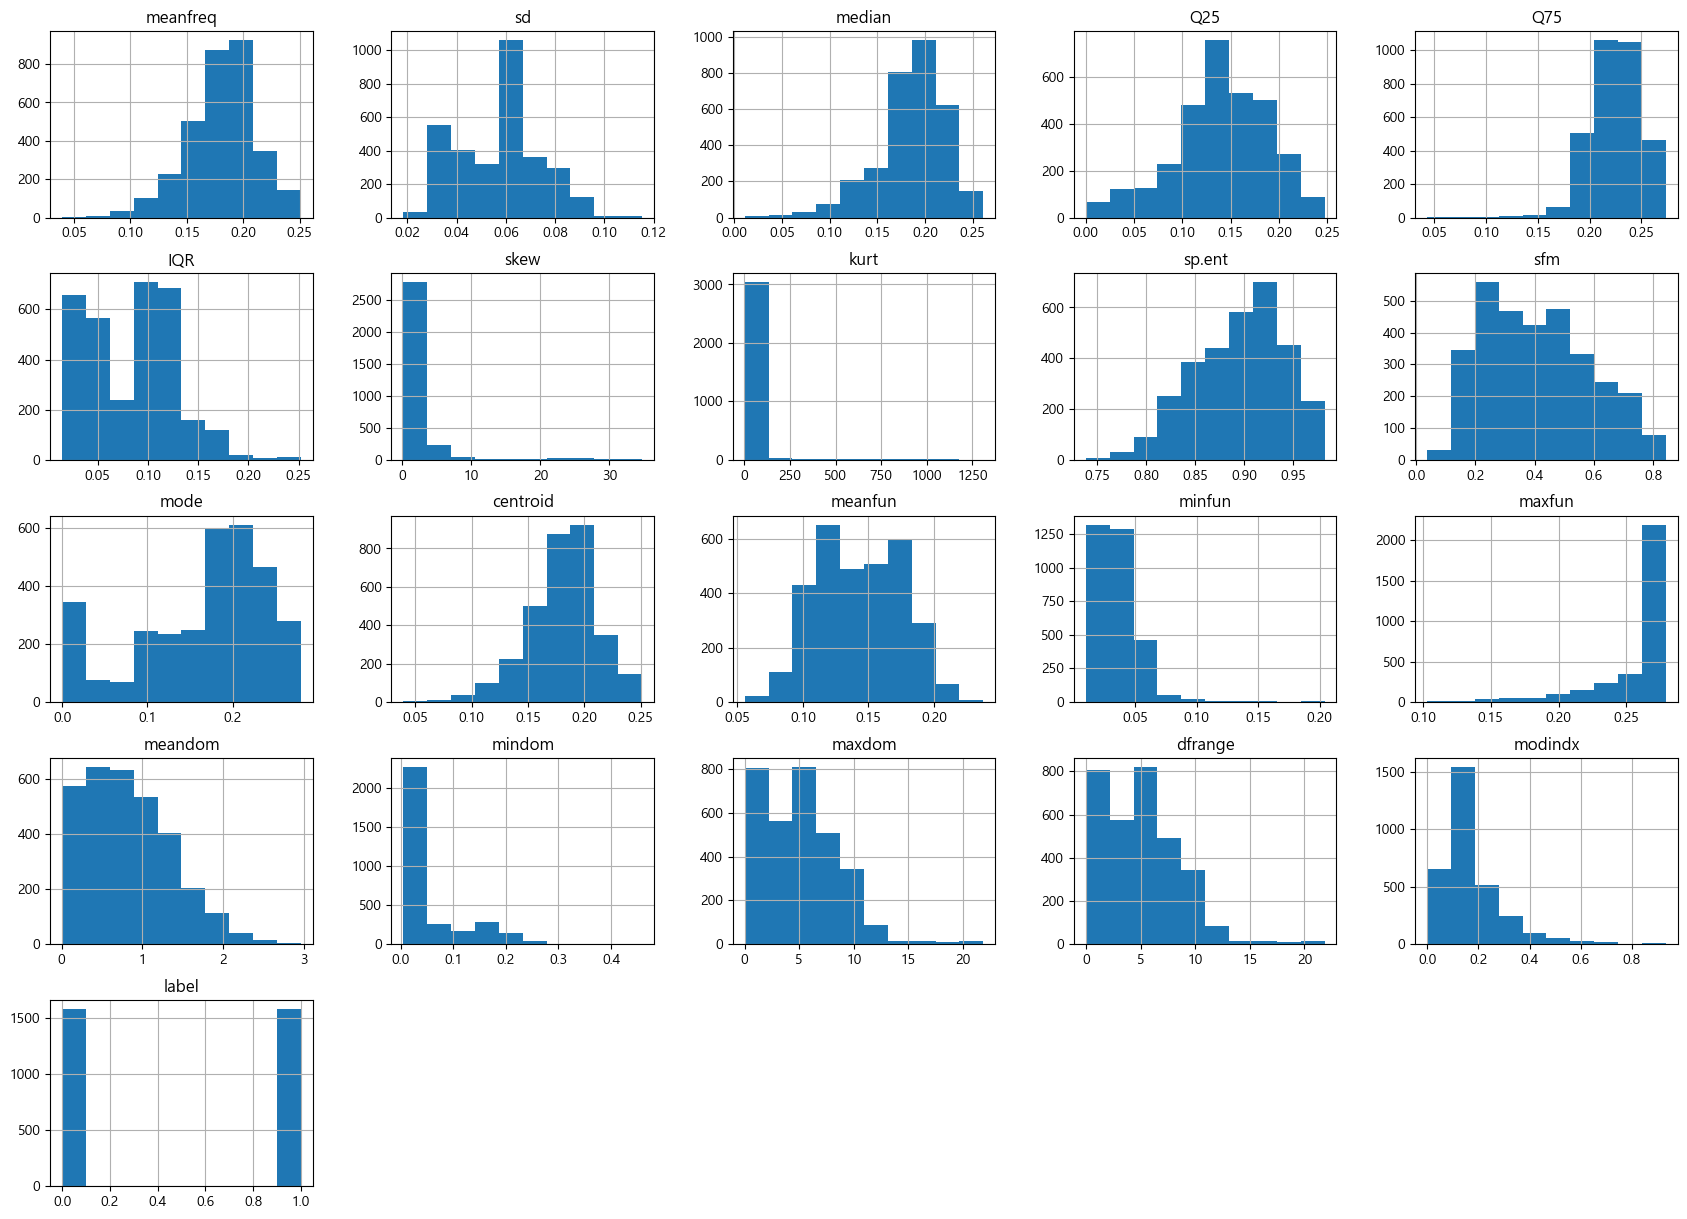

In [251]:
import matplotlib.pyplot as plt, matplotlib as mlp

mlp.rcParams["font.family"] = "Malgun Gothic"

df.hist(column=df.columns, figsize=(21, 15))
plt.show()

#### Input data, output data 구성

In [252]:
X = df.drop(columns=["label"])
y = df["label"]

X.shape, y.shape

((3168, 20), (3168,))

### 머신러닝 알고리즘으로 예측
별도의 데이터 전처리 과정 없이 Logistic Regression모델로 예측을 진행한다.

### 데이터셋 분할

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

### 모델 학습

In [254]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=22, n_jobs = -1)
log.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=22)

### 예측결과 표시 및 평가

In [255]:
from sklearn.metrics import mean_squared_error, accuracy_score
import math

# 예측
y_pred = log.predict(X_test)

# RMSE 평가 지표와 정확도 계산
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)

print(f"RMSE : {RMSE}, accuracy : {round(acc, 2)}")

RMSE : 0.3529952949168565, accuracy : 0.88


### 하이퍼 파라미터 조정(GridSearchCV)
별도의 데이터 전처리, 하이퍼파라미터 조정 없이도 87%의 정확도를 기록했다. 하이퍼 파라미터를 조정하며 성능을 높인다

사용한 하이퍼 파라미터
- max_iter : 학습 반복 횟수
- C : Cost Function의 Cost를 의미. 값이 크면 훈련을 더 복잡하게 하므로 규제가 약해진다. Cost값이 작으면 강한 규제가 적용됨.

In [256]:
from sklearn.model_selection import GridSearchCV

log_params = {
    "max_iter" : [500, 600, 700, 800, 900],
    "C" : [3.0, 3.5, 4.0, 4.5, 5.0]
}

log_grid = GridSearchCV(log, param_grid = log_params, n_jobs = -1, cv = 10, error_score="raise")
log_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=LogisticRegression(n_jobs=-1, random_state=22),
             n_jobs=-1,
             param_grid={'C': [3.0, 3.5, 4.0, 4.5, 5.0],
                         'max_iter': [500, 600, 700, 800, 900]})

In [257]:
log_grid.best_estimator_

LogisticRegression(C=5.0, max_iter=700, n_jobs=-1, random_state=22)

In [258]:
y_pred = log_grid.best_estimator_.predict(X_test)

RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)

print(f"RMSE : {RMSE}, accuracy : {round(acc, 2)}")

RMSE : 0.2025079349615651, accuracy : 0.96


### 신경망으로 예측
머신러닝 알고리즘으로 96%의 정확도를 기록했다. 신경망으로의 예측을 진행한다.

In [264]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout
import numpy as np, tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(2217, 20) (951, 20)
(2217, 1) (951, 1)


#### 모델 빌드

In [265]:
input_ = Input(shape = (20, ))
x = Dense(256, activation = "relu")(input_)
x = Dropout(rate = 0.3)(x)
x = Dense(128, activation = "relu")(x)
x = Dropout(rate = 0.3)(x)
x = Dense(64, activation = "relu")(x)
output_ = Dense(1, activation = "sigmoid")(x)

model = Model(input_, output_)
model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = "binary_crossentropy", metrics=['acc'])
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_55 (Dense)            (None, 256)               5376      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 1)                 65 

#### 콜백함수 정의

In [266]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
import os

save_model = ModelCheckpoint("./model/weights/self-build-{epoch:02d}.hdf5", monitor = "val_loss", mode = "min", save_best_only = True)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10)
reduce_lr = ReduceLROnPlateau(monitor = "val_loss", mode = "min", patience = 5, factor = 0.01)

if not os.path.isdir("./model/"):
    os.mkdir('./model')
csv_logging = CSVLogger('./model/self-build history.csv') # csv logger의 경우 디렉토리가 존재하지 않으면 오류가 발생한다.

callbacks = [save_model, early_stop, reduce_lr, csv_logging]

#### 학습

In [267]:
model.fit(x = x_train, y = y_train, epochs=100, callbacks = callbacks, validation_data = (x_test, y_test))

Epoch 1/100
70/70 [==============================] - 1s 7ms/step - loss: 1.0907 - acc: 0.5120 - val_loss: 0.7084 - val_acc: 0.5447 - lr: 0.0010
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9225 - acc: 0.5323 - val_loss: 1.1029 - val_acc: 0.4953 - lr: 0.0010
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9172 - acc: 0.5584 - val_loss: 0.8744 - val_acc: 0.6646 - lr: 0.0010
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.7868 - acc: 0.5814 - val_loss: 0.8627 - val_acc: 0.6025 - lr: 0.0010
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.8207 - acc: 0.6225 - val_loss: 0.7213 - val_acc: 0.6898 - lr: 0.0010
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.7282 - acc: 0.6373 - val_loss: 0.5853 - val_acc: 0.6887 - lr: 0.0010
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6904 - acc: 0.6752 - val_loss: 0.6158 - val_acc: 0.7087 - lr:

#### 학습곡선 가시화

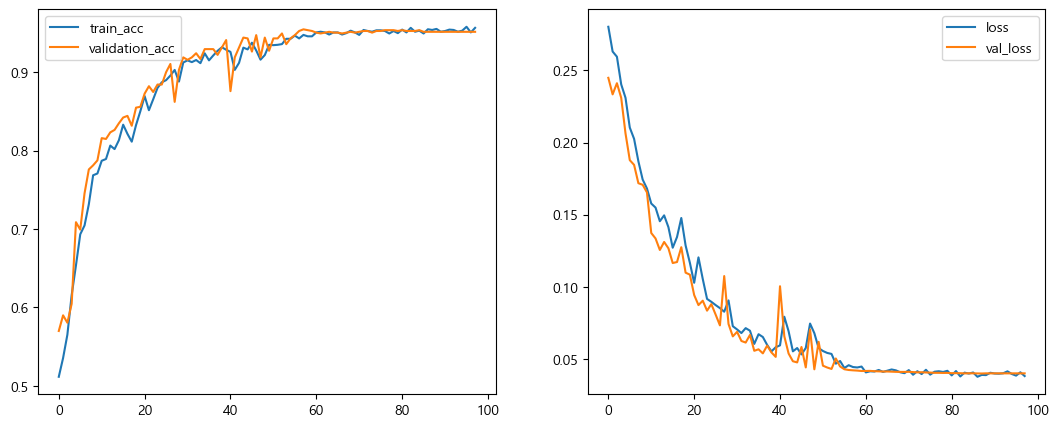

In [263]:
predicted_data = pd.read_csv("./model/self-build history.csv")

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(predicted_data["epoch"], predicted_data["acc"], label = "train_acc")
plt.plot(predicted_data["epoch"], predicted_data["val_acc"], label = "validation_acc")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(predicted_data["epoch"], predicted_data["loss"], label = "loss")
plt.plot(predicted_data["epoch"], predicted_data["val_loss"], label = "val_loss")
plt.legend()